In [1]:
# CVL867: Atomistic and multiscale modelling
# Assignment 01 
# Submitted by : Aman Pawar

'''
Pre-req installs :

!pip install pyriodic-table # For the purpose of data https://pypi.org/project/pyriodic-table/ # requires python >= 3.9
!pip install numpy # For the purpose of optimization and working wilth numpy arrays
!pip install pandas # For the purpose of working with pandas dataframes
!pip intall matplotlib # For the purpose of visualisations and graphs

'''

# Kindly uncomment the undermentioned lines if you are not sure of all the avalival pre-required installs

# !pip install numpy
# !pip install matplotlib
# !pip install pyriodic-table==1.0.1
# !pip install pandas

'\nPre-req installs :\n\n!pip install pyriodic-table # For the purpose of data https://pypi.org/project/pyriodic-table/ # requires python >= 3.9\n!pip install numpy # For the purpose of optimization and working wilth numpy arrays\n!pip install pandas # For the purpose of working with pandas dataframes\n!pip intall matplotlib # For the purpose of visualisations and graphs\n\n'

In [2]:
# importing the necessary libraries

import numpy as np
import pandas as pd
from pyriodic_table.chemelements import Element
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300 #setting the default dpi to 1200 for enhanced quality of plots

# Setting random seed value for the reproduceablity of results
seed_value = 42

import random
random.seed(seed_value)
np.random.seed(seed_value)

In [3]:
# Answer 01

# Selecting 20 elements from the periodic table

def create_dataset(num_of_data_points):
    '''
    Function that creates dataset by acessing the pyriodic_table library using sampling of datapoints

    args
        inputs: number of data points required
        outputs : dict of the periodic table elements and its properties
    '''

    idx = np.linspace(1,num_of_data_points,num_of_data_points) # generating the idx for first 20 elements

    # Iterating over the generated indexes to get the dataset 
    # Doing the necessary preprocessing and storing the dataset in a dictionary
    data = {}
    for i in idx:
        temp = Element(int(i)).get_display_data().splitlines() # Storing the data in a list

        for ix in temp:
            temp_str = ix.split(':') # Splitting the data

            # Storing the data in the dictionary as key and value pairs
            data.setdefault(temp_str[0], []).append(temp_str[1])
    
    return data

data = create_dataset(20)

In [4]:
# Stroring the data in a pandas Dataframe
df = pd.DataFrame.from_dict(data, orient = 'index') 
df = df.transpose()

# Having a look at the head of the dataframe 
df.head(2) # First 2 elements

,Name,Symbol,Atomic number,Atomic mass,Electrons per shell,State (room temperature),Group,Period,Melting point,Boiling point,Density (room temperature),Found naturally,Has stable isotope(s),Discovered by
0,Hydrogen,H,1,1.008,"(1,)",Gas,1,1,13.99 K / -259.16 °C / -434.488 °F,20.271 K / -252.879 °C / -423.1822 °F,8.988e-05 g/cm³,True,True,Henry Cavendish in 1766
1,Helium,He,2,4.0026,"(2,)",Gas,18,1,0.95 K / -272.2 °C / -457.96 °F,4.222 K / -268.928 °C / -452.0704 °F,0.0001786 g/cm³,True,True,"Pierre Janssen, Norman Lockyer in 1868"


In [5]:
def clean_data(data):
    """
    This function is designed to clean the dataset as it contains units written with all 
    entry points, dtype as txt and other problems
    
    args:
        inputs: uncleaned data series/list
        outputs: cleaned data 
    """
    temp = []
    for i, value in enumerate(data):
        if value is not None and value != "":
            temp.append(float(value.split(" ")[1]))
        else:
            temp.append(None)
    return temp

In [6]:
# Cleaning the dataframe 
df["Density g/cm^3"] = clean_data(df["Density (room temperature)"])
df["Melting point K"] = clean_data(df["Melting point"])
df["Boiling point K"] = clean_data(df["Boiling point"])

# Droping the duplicate columns
df.drop(["Melting point",	"Boiling point", "Density (room temperature)"], axis=1, inplace=True)

# Restricting our dataframe to the necessary properties only
property_names = ["Name", "Atomic number",	"Atomic mass", "Melting point K",	"Boiling point K", "Density g/cm^3"]
df_new = df[property_names]
df_new

,Name,Atomic number,Atomic mass,Melting point K,Boiling point K,Density g/cm^3
0,Hydrogen,1,1.008,13.990,20.271,0.000090
1,Helium,2,4.0026,0.950,4.222,0.000179
2,Lithium,3,6.94,453.650,1603.000,0.534000
3,Beryllium,4,9.0122,1560.000,2742.000,1.850000
4,Boron,5,10.81,2349.000,4200.000,2.340000
5,Carbon,6,12.011,3823.000,5100.000,2.270000
6,Nitrogen,7,14.007,63.230,77.355,0.001250
7,Oxygen,8,15.999,54.360,90.188,0.001429
8,Fluorine,9,18.998,53.480,85.030,0.001696
9,Neon,10,20.18,24.560,27.104,0.000900


In [7]:
# Checking the datatype of the columns of the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             20 non-null     object 
 1   Atomic number    20 non-null     object 
 2   Atomic mass      20 non-null     object 
 3   Melting point K  20 non-null     float64
 4   Boiling point K  20 non-null     float64
 5   Density g/cm^3   20 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.1+ KB


In [8]:
# Converting the Atomic number and Atomic mass to float dtype
df_new["Atomic mass"] = df_new["Atomic mass"].astype(float)
df_new["Atomic number"] = df_new["Atomic number"].astype(float)



C:\Users\Ranjana Pawar\AppData\Local\Temp\ipykernel_4348\2085871922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Atomic mass"] = df_new["Atomic mass"].astype(float)
C:\Users\Ranjana Pawar\AppData\Local\Temp\ipykernel_4348\2085871922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Atomic number"] = df_new["Atomic number"].astype(float)


In [9]:
# Part - I to find the maximum value of each of the property

# Algorithm -1  
def algo_1(data):
    # Exhaustive search Complexity O(n)
    """Algo-1 to find the max value
    args
    inputs :
        data : data on which algo to be run
    outputs : ans/value of the max
              index coresponding to the max value  
    """
    # Taking the first element of data
    max = data[0]

    # iterateing over the data from the 2nd element
    # since 1st element is alredy choosen
    for i in range(1,len(data)):
        if max >= data[i]:
            pass
        else:
            max = data[i]
            pos = i
    
    return max, pos



# Algorithm -2
def algo_2(data):
    # Algorithm that finds the max value in sublinear time O(nlog(n))
    
    """Algo-1 to find the max value
    args
    inputs :
        data : data on which algo to be run
    outputs : ans/value of the max
              index coresponding to the max value  
    """
    # Setting Recursion
    if len(data)==1:
        return data[0],0
    
    else:
    # Finding the mid point
        mid = len(data) // 2

        # Using Recursion
        left, lix = algo_2(data[:mid])
        right, rix = algo_2(data[mid:])
        if left > right:
            return left, lix
        else:
            return right, rix + mid
    


In [10]:
# Solution using the 1st Algo

print(f'''Maximum value of Atomic Number : {algo_1(df_new["Atomic number"])[0]} coresponding to {df_new["Name"].iloc[algo_1(df_new["Atomic number"])[1]]}''')
print(f'''Maximum value of Atomic Mass : {algo_1(df_new["Atomic mass"])[0]} coresponding to {df_new["Name"].iloc[algo_1(df_new["Atomic mass"])[1]]}''')
print(f'''Maximum value of Melting point (K) : {algo_1(df_new["Melting point K"])[0]} coresponding to {df_new["Name"].iloc[algo_1(df_new["Melting point K"])[1]]}''')
print(f'''Maximum value of Boiling point (K) : {algo_1(df_new["Boiling point K"])[0]} coresponding to {df_new["Name"].iloc[algo_1(df_new["Boiling point K"])[1]]}''')
print(f'''Maximum value of Density g/cm^3 : {algo_1(df_new["Density g/cm^3"])[0]} coresponding to {df_new["Name"].iloc[algo_1(df_new["Density g/cm^3"])[1]]}''')

Maximum value of Atomic Number : 20.0 coresponding to  Calcium
Maximum value of Atomic Mass : 40.078 coresponding to  Calcium
Maximum value of Melting point (K) : 3823.0 coresponding to  Carbon
Maximum value of Boiling point (K) : 5100.0 coresponding to  Carbon
Maximum value of Density g/cm^3 : 2.7 coresponding to  Aluminium


In [11]:
# Solution using the 2nd Algo

print(f'''Maximum value of Atomic Number : {algo_2(df_new["Atomic number"].values)[0]} coresponding to {df_new["Name"].iloc[algo_2(df_new["Atomic number"].values)[1]]}''')
print(f'''Maximum value of Atomic Mass : {algo_2(df_new["Atomic mass"].values)[0]} coresponding to {df_new["Name"].iloc[algo_2(df_new["Atomic mass"].values)[1]]}''')
print(f'''Maximum value of Melting point (K) : {algo_2(df_new["Melting point K"].values)[0]} coresponding to {df_new["Name"].iloc[algo_2(df_new["Melting point K"].values)[1]]}''')
print(f'''Maximum value of Boiling point (K) : {algo_2(df_new["Boiling point K"].values)[0]} coresponding to {df_new["Name"].iloc[algo_2(df_new["Boiling point K"].values)[1]]}''')
print(f'''Maximum value of Density g/cm^3 : {algo_2(df_new["Density g/cm^3"].values)[0]} coresponding to {df_new["Name"].iloc[algo_2(df_new["Density g/cm^3"].values)[1]]}''')

Maximum value of Atomic Number : 20.0 coresponding to  Calcium
Maximum value of Atomic Mass : 40.078 coresponding to  Calcium
Maximum value of Melting point (K) : 3823.0 coresponding to  Carbon
Maximum value of Boiling point (K) : 5100.0 coresponding to  Carbon
Maximum value of Density g/cm^3 : 2.7 coresponding to  Aluminium


In [12]:
# PART - II
# Sorting the elements in the increasing order of melting point and boiling point

# Algo -1
def sort1(data):
    # bubble sort O(n^2)
    """
    This algo takes inputs and sorts the data in increasing order
    args:
        inputs: data list/series
        outputs: Sorted data points 
    """
    # Creating the indexes -- will be helpful in querying the names from the dataframe
    x = np.linspace(0,len(data),len(data)+1)[:-1]
    data_with_idx = []
    for a,b in zip(data,x):
        data_with_idx.append((a,b))
    
    # Main sorting algorithm
    n = len(data_with_idx)
    for i in range(n):
        for j in range(0, n-i-1):
            if data_with_idx[j][0] > data_with_idx[j+1][0] :
                data_with_idx[j], data_with_idx[j+1] = data_with_idx[j+1], data_with_idx[j]
    return data_with_idx

# Algo -2
def sort2(data):
    # Insertion sort O(n^2)
    """
    This algo takes inputs and sorts the data in increasing order
    args:
        inputs: data list/series
        outputs: Sorted data points 
    """
    
    n = len(data)
    output = [(val, i) for i, val in enumerate(data)]
    for i in range(1, n):
        key_val = output[i][0]
        key_index = output[i][1]
        j = i-1
        while j >= 0 and output[j][0] > key_val:
            output[j+1] = output[j]
            j -= 1
        output[j+1] = (key_val, key_index)
    return [val for val, i in output], [i for val, i in output]

# Algo -3
def sort3(data):
    # selection sort O(n^2)
    """
    This algo takes inputs and sorts the data in increasing order
    args:
        inputs: data list/series
        outputs: Sorted data points 
    """

    n = len(data)
    output = [(val, i) for i, val in enumerate(data)]
    for i in range(n-1):
        min_index = i
        for j in range(i+1, n):
            if output[j][0] < output[min_index][0]:
                min_index = j
        if min_index != i:
            output[i], output[min_index] = output[min_index], output[i]
    return [val for val, i in output], [i for val, i in output]



In [13]:
# Solution using 1st algo
print("Sorted List of Melting point of elements using sort1")
x = sort1(df_new["Melting point K"])
for i in range(len(x)):
    print(f"Melting point {x[i][0]} : {df_new.Name.iloc[int(x[i][1])]} -->>\t")

print("\n\nSorted List of Boiling point of elements using sort1")
x = sort1(df_new["Boiling point K"])
for i in range(len(x)):
    print(f"Boiling point {x[i][0]} : {df_new.Name.iloc[int(x[i][1])]} -->>\t")

Sorted List of Melting point of elements using sort1
Melting point 0.95 :  Helium -->>	
Melting point 13.99 :  Hydrogen -->>	
Melting point 24.56 :  Neon -->>	
Melting point 53.48 :  Fluorine -->>	
Melting point 54.36 :  Oxygen -->>	
Melting point 63.23 :  Nitrogen -->>	
Melting point 83.81 :  Argon -->>	
Melting point 171.6 :  Chlorine -->>	
Melting point 317.3 :  Phosphorus -->>	
Melting point 336.7 :  Potassium -->>	
Melting point 370.944 :  Sodium -->>	
Melting point 388.36 :  Sulfur -->>	
Melting point 453.65 :  Lithium -->>	
Melting point 923.0 :  Magnesium -->>	
Melting point 933.47 :  Aluminium -->>	
Melting point 1115.0 :  Calcium -->>	
Melting point 1414.0 :  Silicon -->>	
Melting point 1560.0 :  Beryllium -->>	
Melting point 2349.0 :  Boron -->>	
Melting point 3823.0 :  Carbon -->>	


Sorted List of Boiling point of elements using sort1
Boiling point 4.222 :  Helium -->>	
Boiling point 20.271 :  Hydrogen -->>	
Boiling point 27.104 :  Neon -->>	
Boiling point 77.355 :  Nitrog

In [14]:
# Solution using 2nd algo
print("Sorted List of Melting point of elements using sort2")
x = sort2(df_new["Melting point K"])
for i in range(len(x[0])):
    print(f"Melting point {x[0][i]} : {df_new.Name.iloc[int(x[1][i])]} -->>\t")

print("\n\nSorted List of Boiling point of elements using sort2")
x = sort2(df_new["Boiling point K"])
for i in range(len(x[0])):
    print(f"Boiling point {x[0][i]} : {df_new.Name.iloc[int(x[1][i])]} -->>\t")

Sorted List of Melting point of elements using sort2
Melting point 0.95 :  Helium -->>	
Melting point 13.99 :  Hydrogen -->>	
Melting point 24.56 :  Neon -->>	
Melting point 53.48 :  Fluorine -->>	
Melting point 54.36 :  Oxygen -->>	
Melting point 63.23 :  Nitrogen -->>	
Melting point 83.81 :  Argon -->>	
Melting point 171.6 :  Chlorine -->>	
Melting point 317.3 :  Phosphorus -->>	
Melting point 336.7 :  Potassium -->>	
Melting point 370.944 :  Sodium -->>	
Melting point 388.36 :  Sulfur -->>	
Melting point 453.65 :  Lithium -->>	
Melting point 923.0 :  Magnesium -->>	
Melting point 933.47 :  Aluminium -->>	
Melting point 1115.0 :  Calcium -->>	
Melting point 1414.0 :  Silicon -->>	
Melting point 1560.0 :  Beryllium -->>	
Melting point 2349.0 :  Boron -->>	
Melting point 3823.0 :  Carbon -->>	


Sorted List of Boiling point of elements using sort2
Boiling point 4.222 :  Helium -->>	
Boiling point 20.271 :  Hydrogen -->>	
Boiling point 27.104 :  Neon -->>	
Boiling point 77.355 :  Nitrog

In [15]:
# Solution using 3rd algo
print("Sorted List of Melting point of elements using sort3")
x = sort3(df_new["Melting point K"])
for i in range(len(x[0])):
    print(f"Melting point {x[0][i]} : {df_new.Name.iloc[int(x[1][i])]} -->>\t")

print("\n\nSorted List of Boiling point of elements using sort3")
x = sort3(df_new["Boiling point K"])
for i in range(len(x[0])):
    print(f"Boiling point {x[0][i]} : {df_new.Name.iloc[int(x[1][i])]} -->>\t")

Sorted List of Melting point of elements using sort3
Melting point 0.95 :  Helium -->>	
Melting point 13.99 :  Hydrogen -->>	
Melting point 24.56 :  Neon -->>	
Melting point 53.48 :  Fluorine -->>	
Melting point 54.36 :  Oxygen -->>	
Melting point 63.23 :  Nitrogen -->>	
Melting point 83.81 :  Argon -->>	
Melting point 171.6 :  Chlorine -->>	
Melting point 317.3 :  Phosphorus -->>	
Melting point 336.7 :  Potassium -->>	
Melting point 370.944 :  Sodium -->>	
Melting point 388.36 :  Sulfur -->>	
Melting point 453.65 :  Lithium -->>	
Melting point 923.0 :  Magnesium -->>	
Melting point 933.47 :  Aluminium -->>	
Melting point 1115.0 :  Calcium -->>	
Melting point 1414.0 :  Silicon -->>	
Melting point 1560.0 :  Beryllium -->>	
Melting point 2349.0 :  Boron -->>	
Melting point 3823.0 :  Carbon -->>	


Sorted List of Boiling point of elements using sort3
Boiling point 4.222 :  Helium -->>	
Boiling point 20.271 :  Hydrogen -->>	
Boiling point 27.104 :  Neon -->>	
Boiling point 77.355 :  Nitrog

In [16]:
# Answer 2

def pearsons_corelation(data1, data2):
    """
    Function to compute the pearsons coefficient
    args:
        inputs: data1 and data2 the data points whose corelation coefficient is to be found
        outputs: pearsons corelation coefficient
    """
    if len(data1) != len(data2):
        return print(f"The shapes of data are inconsistant {len(data1)} != {len(data2)}")
    else:
        s_x1, s_x2, x1_2, x2_2, x1x2 = 0, 0, 0, 0, 0
        n = len(data1)
        
        for x1, x2 in zip(data1,data2):

            x1 = float(x1)
            x2 = float(x2)

            s_x1 += x1
            s_x2 += x2
            x1x2 += x1*x2
            x1_2 += x1*x1
            x2_2 += x2*x2

        r = (n*x1x2 - s_x1*s_x2)/((n*x1_2-(s_x1**2))*(n*x2_2-(s_x2**2)))**0.5
        return r



def spearman_corelation(data1, data2):
    """
    Function to compute the spearman coefficient
    args:
        inputs: data1 and data2 the data points whose corelation coefficient is to be found
        outputs: spearman corelation coefficient
    """


    def calculate_rank(data):
        n = len(data)
        rank = [0] * n
        index = [i for i in range(n)]
        index.sort(key=lambda x: data[x])
        #index = sort_index_list(index)
        for i in range(n):
            rank[index[i]] = i + 1
        return rank


    n = len(data1)
    rank1 = calculate_rank(data1)
    rank2 = calculate_rank(data2)
    d_squared = sum([(rank1[i] - rank2[i]) ** 2 for i in range(n)])
    return 1 - ((6 * d_squared) / (n * (n**2 - 1)))


In [17]:
print(f'The pearsons corelation value between mass and density is {pearsons_corelation(df_new["Atomic mass"], df_new["Density g/cm^3"])}')
print(f'The pearsons corelation value between melting point and boiling point is {pearsons_corelation(df_new["Melting point K"], df_new["Boiling point K"])}')
print(f'The pearsons corelation value between density and melting point is {pearsons_corelation(df_new["Density g/cm^3"], df_new["Melting point K"])}')

print(f'\n\nThe Spearmans corelation value between mass and density is {spearman_corelation(df_new["Atomic mass"], df_new["Density g/cm^3"])}')
print(f'The Spearmans corelation value between melting point and boiling point is {spearman_corelation(df_new["Melting point K"], df_new["Boiling point K"])}')
print(f'The Spearmans corelation value between density and melting point is {spearman_corelation(df_new["Density g/cm^3"], df_new["Melting point K"])}')

The pearsons corelation value between mass and density is 0.16686780365213874
The pearsons corelation value between melting point and boiling point is 0.9446809692277154
The pearsons corelation value between density and melting point is 0.7091338228804424


The Spearmans corelation value between mass and density is 0.2706766917293233
The Spearmans corelation value between melting point and boiling point is 0.9789473684210527
The Spearmans corelation value between density and melting point is 0.9037593984962407


In [18]:
# Answer 3

def data_preprocess(num):

    """
    Function that preprocesses the dataset and returns the final dataframe
    """
    data = create_dataset(num)

    # Stroring the data in a pandas Dataframe
    df = pd.DataFrame.from_dict(data, orient = 'index') 
    df = df.transpose()

    df["Density g/cm^3"] = clean_data(df["Density (room temperature)"])
    df["Melting point K"] = clean_data(df["Melting point"])
    df["Boiling point K"] = clean_data(df["Boiling point"])

    # Droping the duplicate columns
    df.drop(["Melting point",	"Boiling point", "Density (room temperature)"], axis=1, inplace=True)

    # Restricting our dataframe to the necessary properties only
    property_names = ["Name", "Atomic number",	"Atomic mass", "Melting point K",	"Boiling point K", "Density g/cm^3"]
    df_new = df[property_names]

    return df_new


In [19]:
# preprocessing and generating the dataset for answer 3
data_40 = data_preprocess(40)
data_80 = data_preprocess(80)

data_40.head(2)

,Name,Atomic number,Atomic mass,Melting point K,Boiling point K,Density g/cm^3
0,Hydrogen,1,1.008,13.99,20.271,0.000090
1,Helium,2,4.0026,0.95,4.222,0.000179


In [20]:
# Checking the 40 atom generated dataset
data_40

,Name,Atomic number,Atomic mass,Melting point K,Boiling point K,Density g/cm^3
0,Hydrogen,1,1.008,13.9900,20.271,0.000090
1,Helium,2,4.0026,0.9500,4.222,0.000179
2,Lithium,3,6.94,453.6500,1603.000,0.534000
3,Beryllium,4,9.0122,1560.0000,2742.000,1.850000
4,Boron,5,10.81,2349.0000,4200.000,2.340000
5,Carbon,6,12.011,3823.0000,5100.000,2.270000
6,Nitrogen,7,14.007,63.2300,77.355,0.001250
7,Oxygen,8,15.999,54.3600,90.188,0.001429
8,Fluorine,9,18.998,53.4800,85.030,0.001696
9,Neon,10,20.18,24.5600,27.104,0.000900


In [21]:
data_80

,Name,Atomic number,Atomic mass,Melting point K,Boiling point K,Density g/cm^3
0,Hydrogen,1,1.008,13.990,20.271,0.000090
1,Helium,2,4.0026,0.950,4.222,0.000179
2,Lithium,3,6.94,453.650,1603.000,0.534000
3,Beryllium,4,9.0122,1560.000,2742.000,1.850000
4,Boron,5,10.81,2349.000,4200.000,2.340000
...,...,...,...,...,...,...
75,Osmium,76,190.23,3306.000,5285.000,22.590000
76,Iridium,77,192.22,2719.000,4403.000,22.560000
77,Platinum,78,195.08,2041.400,4098.000,21.450000
78,Gold,79,196.97,1337.330,3243.000,19.300000


In [22]:
import time
def time_lst(data):

    """
    Function that returns the time taken by various algorithms to sort the various properties of the dataset
    args:
        inputs: dataset on which you want the time
        outputs: lists contaning time of various algos on various taskys
    """
    s1,s2,s3 = [],[],[]
    s = [sort1, sort2, sort3]
    for ix in s:
        values = ['Atomic number',	'Atomic mass',	'Melting point K',	'Boiling point K',	'Density g/cm^3']
        for i in values:
            t0= time.time()
            time.sleep(1) # simulating some computation
            ix(data[i])
            t1 = time.time() - t0
            if ix == sort1:
                s1.append(t1)
            elif ix == sort2:
                s2.append(t1)
            else:
                s3.append(t1)
    return s1, s2, s3

In [23]:
time_40 = time_lst(data_40)
time_80 = time_lst(data_80)

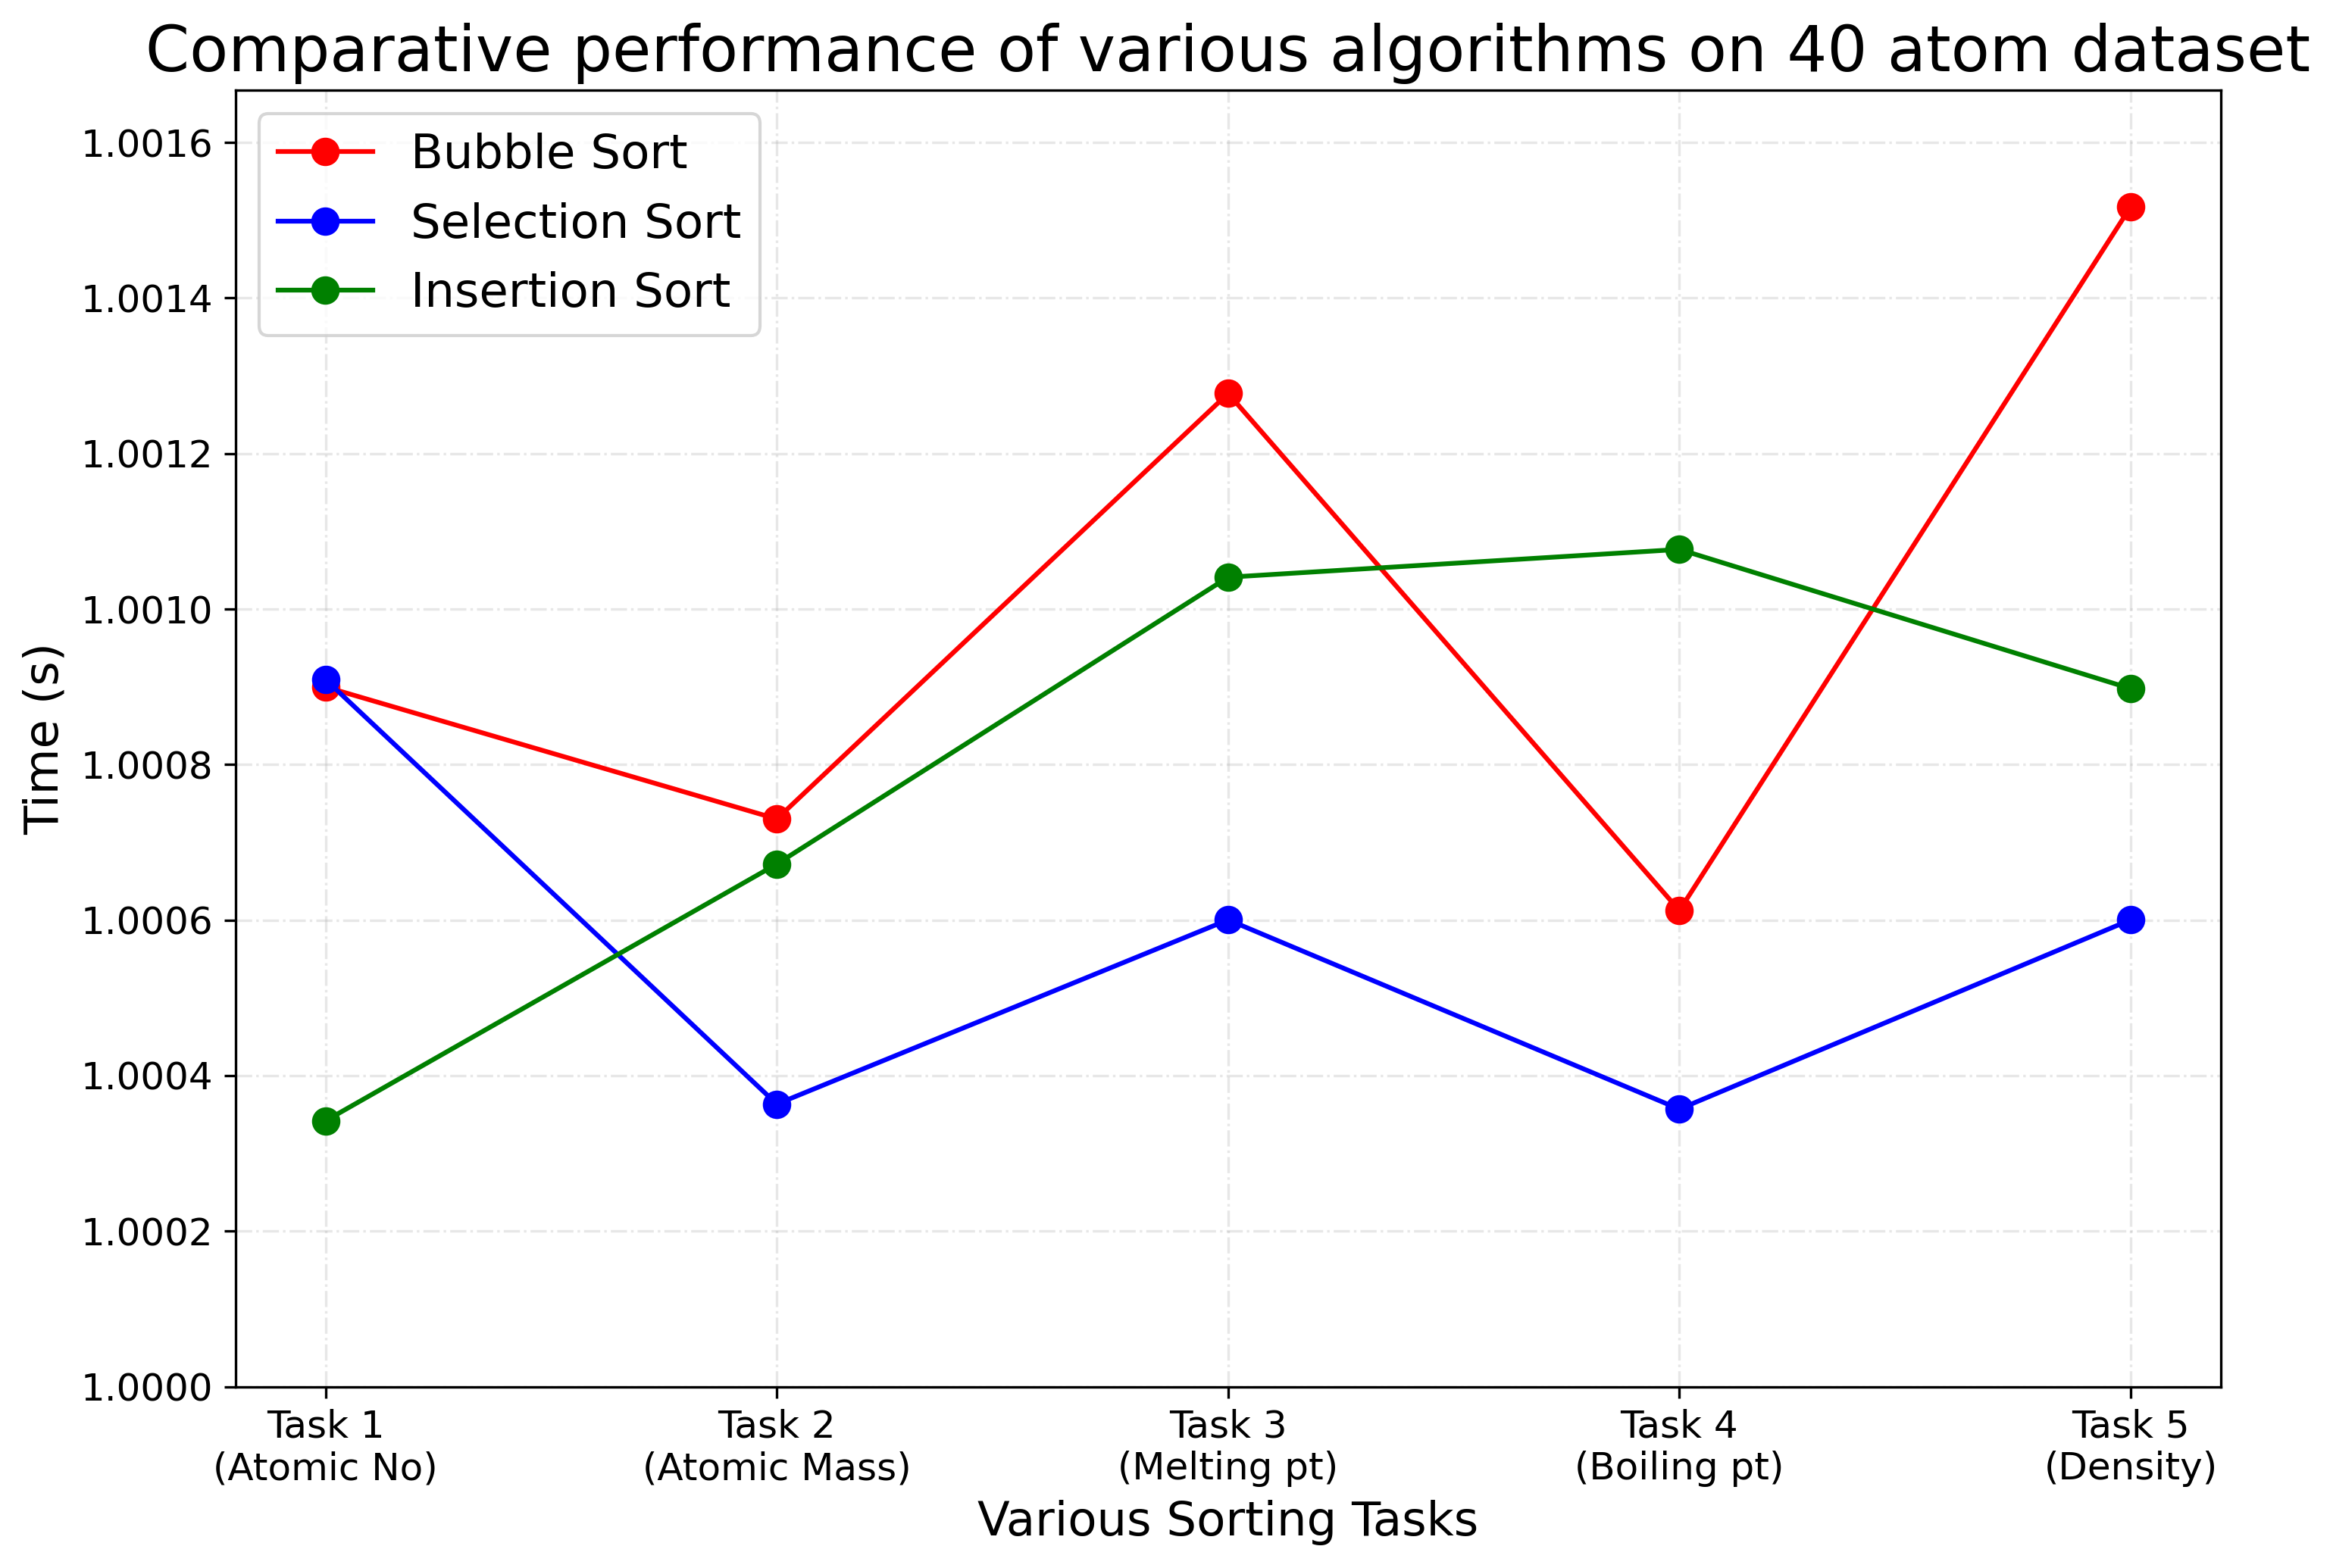

In [26]:




plt.figure(figsize=(10,7))

# Plotting the execution time of bubble sort
plt.plot(np.linspace(1,5,5),time_40[0], '-or', markersize=8, label="Bubble Sort")

# Plotting the execution time of selection sort
plt.plot(np.linspace(1,5,5),time_40[1], '-ob', markersize=8, label="Selection Sort")

# Plotting the execution time of insertion sort
plt.plot(np.linspace(1,5,5),time_40[2],'-og', markersize=8, label="Insertion Sort")

# Adding title and labels
plt.title("Comparative performance of various algorithms on 40 atom dataset", fontsize=20)
plt.xlabel("Various Sorting Tasks", fontsize=15)
plt.ylabel("Time (s)", fontsize=15)

# Setting the limit of y-axis
plt.ylim(1, max(time_40[0]+time_40[1]+time_40[2])+0.00015)

# Adding grid
plt.grid(True, which='both', linestyle='-.', alpha=0.3)

# Adding legend
plt.legend(fontsize=15)

plt.xticks(np.linspace(1, 5, 5),  ["Task 1\n(Atomic No)", "Task 2\n(Atomic Mass)", 
                                    "Task 3\n(Melting pt)", "Task 4\n(Boiling pt)", "Task 5\n(Density)"])
# Increasing the size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tightening the layout
plt.tight_layout()

# Showing the plot
plt.show();


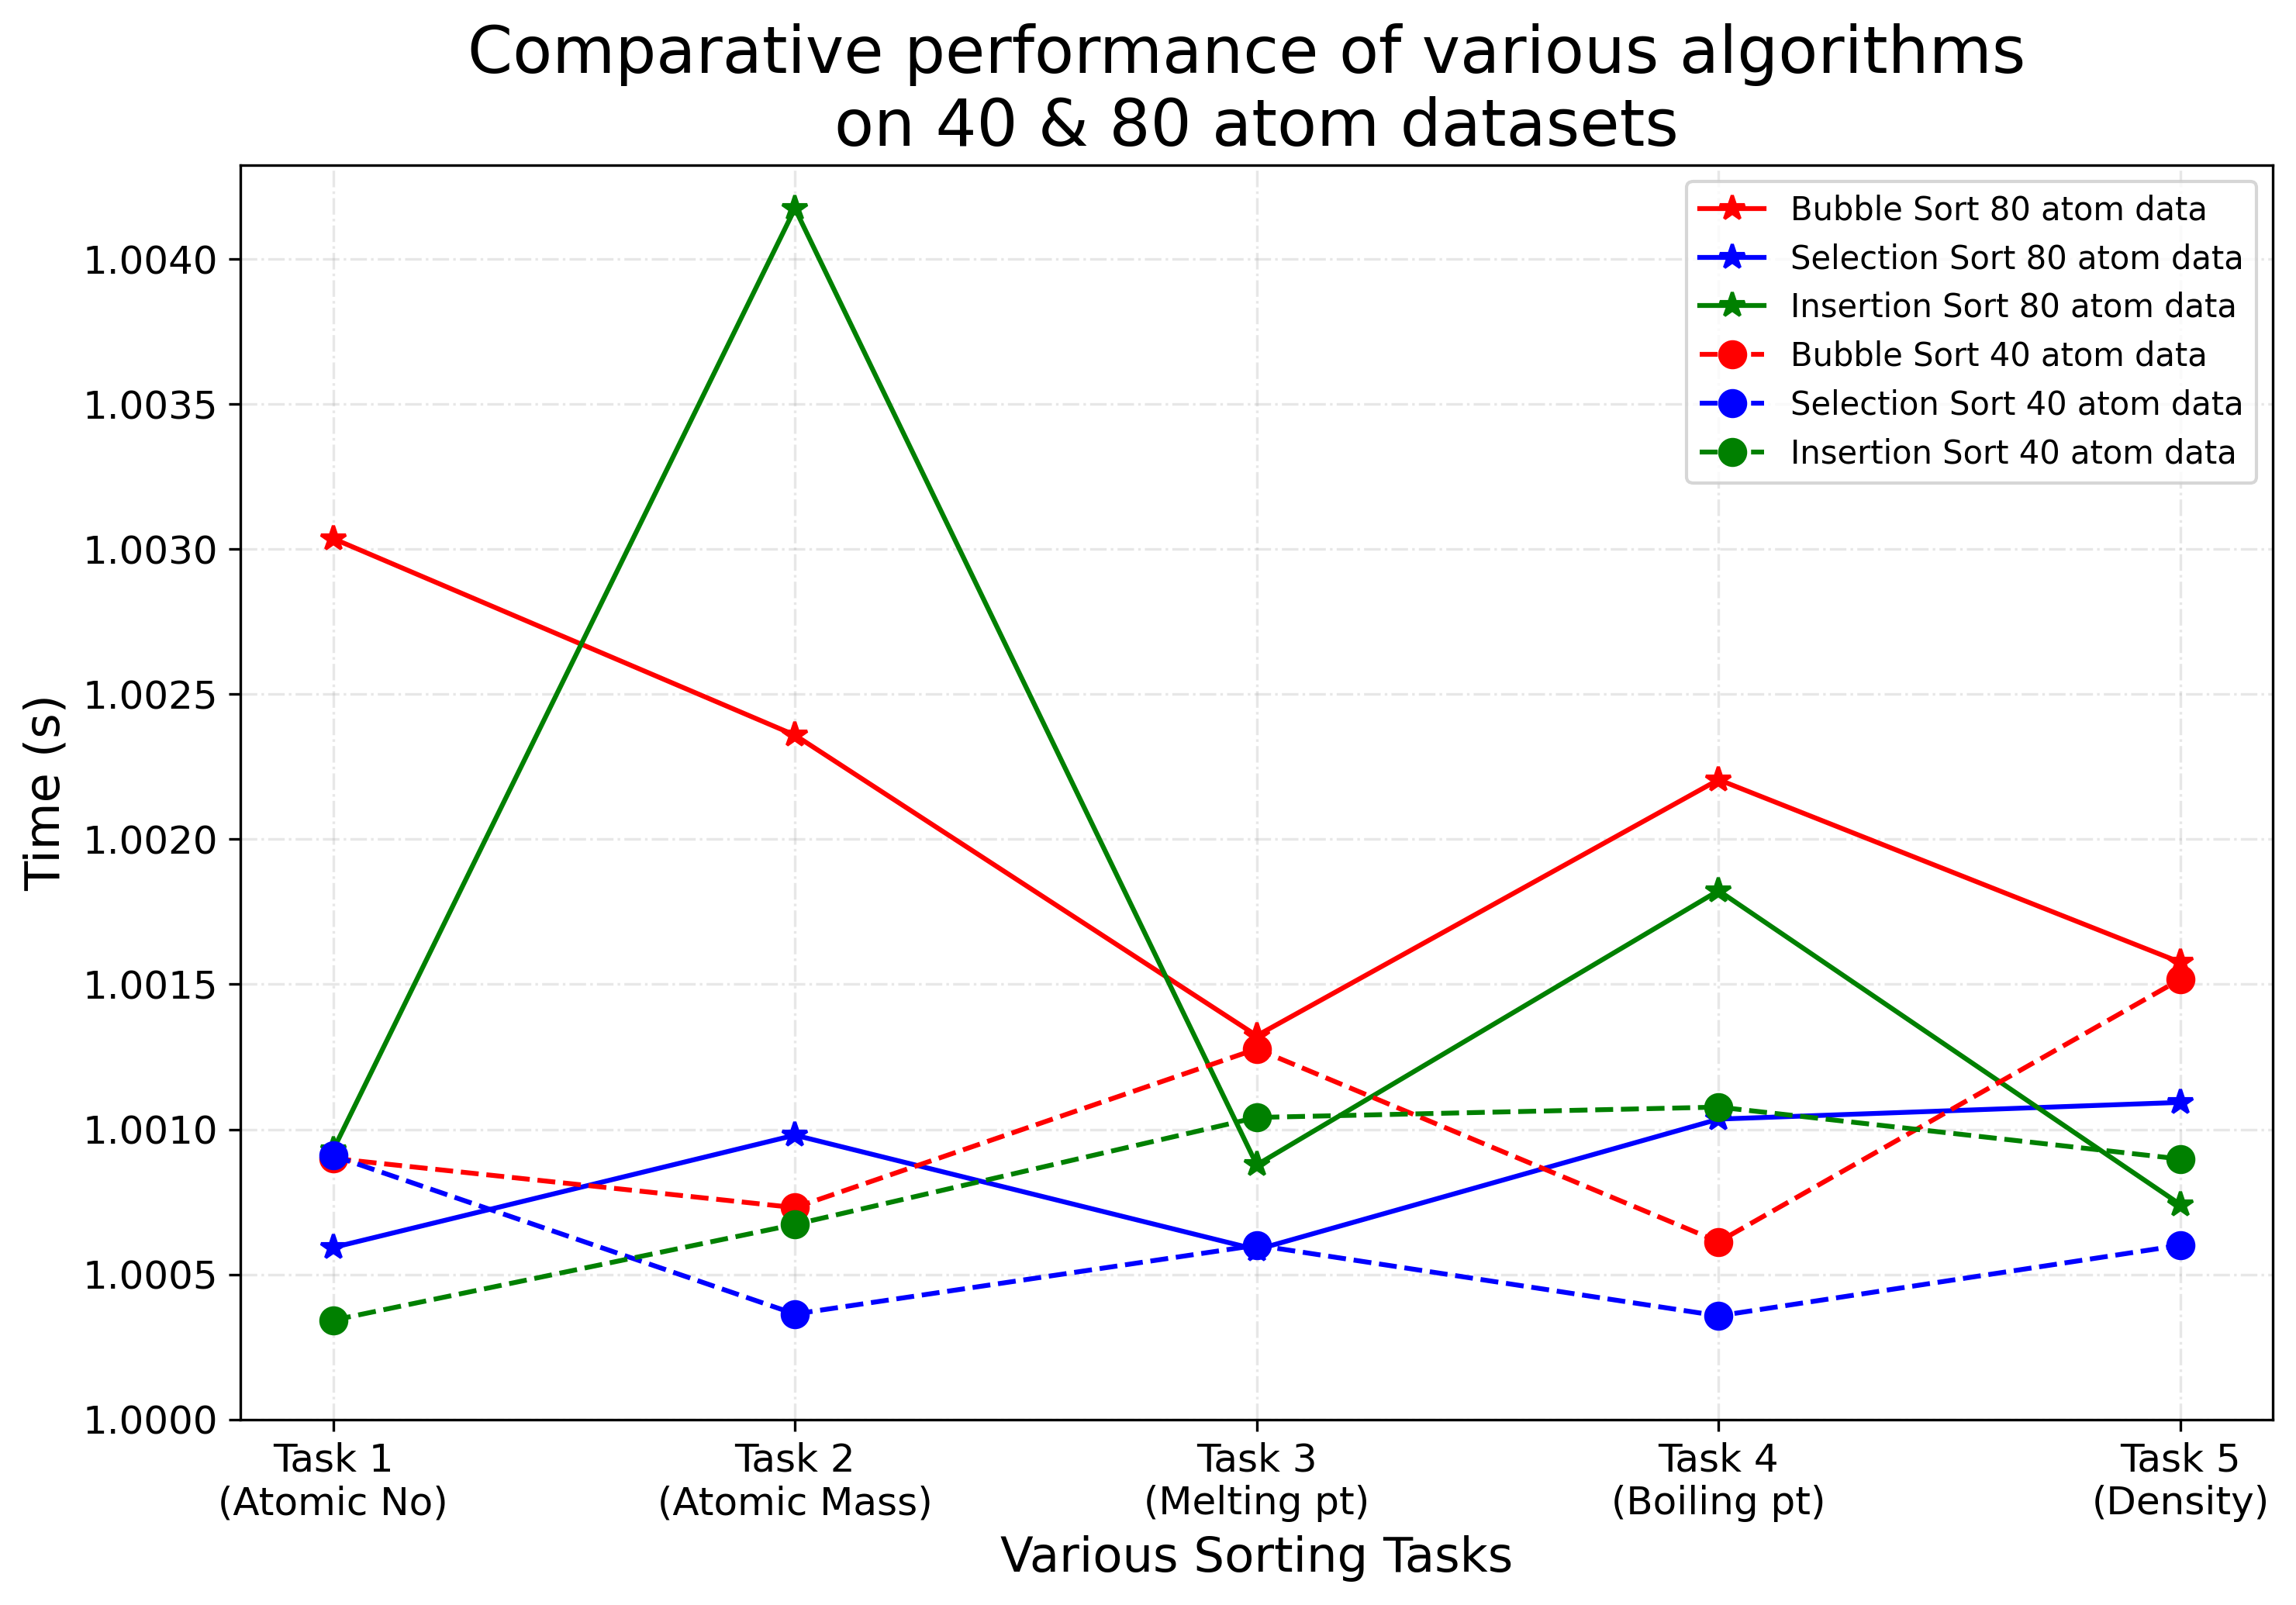

In [27]:

plt.figure(figsize=(10,7))

# Plotting the execution time of bubble sort
plt.plot(np.linspace(1,5,5),time_80[0], '-*r', markersize=8, label="Bubble Sort 80 atom data")

# Plotting the execution time of selection sort
plt.plot(np.linspace(1,5,5),time_80[1], '-*b', markersize=8, label="Selection Sort 80 atom data")

# Plotting the execution time of insertion sort
plt.plot(np.linspace(1,5,5),time_80[2],'-*g', markersize=8, label="Insertion Sort 80 atom data")


plt.plot(np.linspace(1,5,5),time_40[0], '--or', markersize=8, label="Bubble Sort 40 atom data")

# Plotting the execution time of selection sort
plt.plot(np.linspace(1,5,5),time_40[1], '--ob', markersize=8, label="Selection Sort 40 atom data")

# Plotting the execution time of insertion sort
plt.plot(np.linspace(1,5,5),time_40[2],'--og', markersize=8, label="Insertion Sort 40 atom data")


# Adding title and labels
plt.title("Comparative performance of various algorithms \non 40 & 80 atom datasets", fontsize=20)
plt.xlabel("Various Sorting Tasks", fontsize=15)
plt.ylabel("Time (s)", fontsize=15)

# Setting the limit of y-axis
plt.ylim(1, max(time_80[0]+time_80[1]+time_80[2])+0.00015)

# Adding grid
plt.grid(True, which='both', linestyle='-.', alpha=0.3)

# Adding legend
plt.legend(fontsize=10)
plt.xticks(np.linspace(1, 5, 5), ["Task 1\n(Atomic No)", "Task 2\n(Atomic Mass)", 
                                    "Task 3\n(Melting pt)", "Task 4\n(Boiling pt)", "Task 5\n(Density)"])
# Increasing the size of tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Tightening the layout
plt.tight_layout()

# Showing the plot
plt.show();
